In [312]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

# Assignment 5

## 1. Choose a regression dataset (bikeshare is allowed), perform a test/train split, and build a regression model (just like in assingnment 3), and calculate the 

#### Training Error (MSE, MAE)
#### Testing Error (MSE, MAE)

In [313]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [368]:
# Training dataset
trdata = pd.read_csv('../data/covid.csv')

In [350]:
# Testing dataset
tedata = pd.read_csv('../data/covid.csv')

In [351]:
y = trdata["Death"]
x = trdata.drop(["Death"], axis = 1)

In [352]:
y.shape, y.size

((319,), 319)

In [353]:
x.shape, x.size

((319, 38), 12122)

In [354]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [355]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg.coef_, linreg.intercept_

(array([-1.00032134e-01, -6.28537897e-02,  3.85623197e-02,  1.78120957e-01,
        -1.73988857e-01, -2.76266318e-01,  2.28215322e-01,  9.50668335e-03,
         7.74495999e-04,  6.16545935e-01,  6.56954833e-02,  1.12410081e-15,
        -5.67889962e-01,  1.39552126e-01,  1.07917495e-01, -9.80341903e-02,
        -1.70395100e-02, -5.16755055e-02, -8.61303950e-02,  1.35201798e-01,
         1.00526256e-01,  6.52103124e-02, -2.95802361e-02,  4.15640737e-02,
         2.37563206e-02, -5.65528933e-02,  4.38062334e-02, -4.11617111e-02,
        -5.29279633e-03, -5.10019456e-02, -2.18937217e-02, -1.07001148e-01,
         2.77555756e-17, -7.04437947e-02, -1.49354387e-02, -1.07001148e-01,
         2.66126956e-03, -1.85829082e-02]),
 0.051376161051944313)

In [356]:
pred = linreg.predict(x_train)

In [357]:
heart_disease = x_train["Heart disease"]

In [358]:
heart_disease.shape, pred.shape

((159,), (159,))

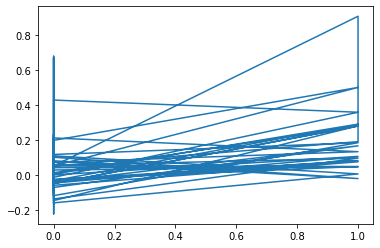

In [359]:
plt.plot(heart_disease, pred)

In [360]:
# Train MSE and MAE
print(mean_squared_error(y_train, pred))
print(mean_absolute_error(y_train, pred))

0.032894072366219426
0.10559202538721994


In [363]:
# Test MSE and MAE
print(mean_squared_error(y_test, np.dot(x_test, linreg.coef_) + linreg.intercept_))
print(mean_absolute_error(y_test, np.dot(x_test, linreg.coef_) + linreg.intercept_))

0.07516533135135324
0.14842333852165074


## 2. Choose a classification dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
#### Accuracy
#### Confusion Matrix
#### Classifcation Report

In [381]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix
                            )

In [405]:
model = DecisionTreeClassifier(criterion = "entropy")

In [406]:
model.fit(trdata.drop(["Death"], axis = 1), trdata.Death)

DecisionTreeClassifier(criterion='entropy')

In [407]:
list(zip(trdata.drop(["Death"], axis = 1).columns, model.feature_importances_))

[('CBC/CRP', 0.10927955353972686),
 ('Traveling in past 3 months ago', 0.001108024675533264),
 ('Connection with a suspected (covid-19) person', 0.0029410012488213563),
 ('Diabetes', 0.04152608671398356),
 ('blood pressure', 0.0693419819146794),
 ('Asthma', 0.0413161274777236),
 ('Heart disease', 0.052924078580527126),
 ('kidney disease', 0.09430407628238216),
 ('Respiratory disease', 0.05239074705358912),
 ('Cancer', 0.11804601451444832),
 ('Corticosteroids', 0.0),
 ('HIV', 0.0),
 (' transplant', 0.0),
 ('HEM', 0.0244129711043944),
 (' Immunodeficiency', 0.0),
 ('Liver disease', 0.040981010620745724),
 ('Rheumatological disease', 0.0),
 (' Chest pain', 0.0),
 ('Fever', 0.020080922305471725),
 ('Trembling or Shakes', 0.002059458722032772),
 ('Weakness', 0.03687419051155895),
 ('Sweating', 0.0),
 ('Sore throat', 0.0485478070692718),
 ('dyspnea', 0.1132095583863847),
 ('Dry cough', 0.03629134661895331),
 ('Cough with sputum', 0.0),
 ('Fatigue, whole body hurts', 0.010061922123461266),
 (

In [384]:
trdata.drop(["Death"], axis=1).head()

,CBC/CRP,Traveling in past 3 months ago,Connection with a suspected (covid-19) person,Diabetes,blood pressure,Asthma,Heart disease,kidney disease,Respiratory disease,Cancer,...,Ageusia,Anorexie,Eczema,Conjunctivitis (Pink eye),Blindness and Tunnel vision,Vertigo,Nausea/Diarrhea,Tobacco,Chest pain: Diagnosis of stroke or heart disease,The Infected person ( covid-19) in family
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [409]:
set(tedata.columns) - set(trdata.columns)

set()

In [410]:
predictions = model.predict(tedata.drop(["Death"], axis = 1))

In [411]:
predictions_train = model.predict(trdata.drop(["Death"], axis = 1))

In [412]:
trdata.drop(["Death"], axis = 1).head()

,CBC/CRP,Traveling in past 3 months ago,Connection with a suspected (covid-19) person,Diabetes,blood pressure,Asthma,Heart disease,kidney disease,Respiratory disease,Cancer,...,Ageusia,Anorexie,Eczema,Conjunctivitis (Pink eye),Blindness and Tunnel vision,Vertigo,Nausea/Diarrhea,Tobacco,Chest pain: Diagnosis of stroke or heart disease,The Infected person ( covid-19) in family
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [413]:
trdata.Death.size

319

In [414]:
accuracy_score(trdata.Death, predictions)

0.9749216300940439

In [415]:
accuracy_score(trdata.Death, predictions_train)

0.9749216300940439

In [400]:
predictions.shape, trdata.Death.values.shape

((319,), (319,))

In [401]:
(trdata.Death.values == predictions).sum()/len(predictions)

0.9341692789968652

In [403]:
confusion_matrix(trdata.Death, predictions_train)

array([[298,   0],
       [  8,  13]], dtype=int64)

In [404]:
print(classification_report(trdata.Death, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       298
           1       0.00      0.00      0.00        21

    accuracy                           0.93       319
   macro avg       0.47      0.50      0.48       319
weighted avg       0.87      0.93      0.90       319



c:\users\cneub\desktop\mlnn-masamitsu\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cneub\desktop\mlnn-masamitsu\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cneub\desktop\mlnn-masamitsu\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

I think that my data is overfit because the accuracy is way too high. The predictions for both the training and test datasets are the same. I thought perhaps columns that had no COVID deaths may have an impact on that, so I dropped them. However, I still didn't see the results improve...

In [117]:
tedata.columns[(tedata == 0).all()]
tedata.loc[:, (tedata == 0).all()]

,HIV,Blindness and Tunnel vision
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
314,0,0
315,0,0
316,0,0
317,0,0


In [128]:
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(tedata.drop(["Death", "HIV", "Blindness and Tunnel vision"], axis = 1), tedata.Death)

DecisionTreeClassifier(criterion='entropy')

In [129]:
predictions_train = model.predict(tedata.drop(["Death", "HIV", "Blindness and Tunnel vision"], axis = 1))

In [130]:
print(classification_report(trdata.Death, predictions_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       298
           1       1.00      0.62      0.76        21

    accuracy                           0.97       319
   macro avg       0.99      0.81      0.88       319
weighted avg       0.98      0.97      0.97       319



The results are still overfit, so below I dropped about half of the features.

In [172]:
trdata = pd.read_csv('../data/covid.csv')

In [170]:
new_trdata = trdata.drop(trdata.columns[0:17], axis = 1, inplace = True)


In [174]:
trdata.drop(trdata.columns[0:17], axis = 1, inplace = True)
trdata

,Nausea/Diarrhea,Tobacco,Chest pain: Diagnosis of stroke or heart disease,The Infected person ( covid-19) in family,Death
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
314,0,0,0,0,0
315,0,0,0,0,0
316,0,0,0,0,1
317,0,0,0,1,0


In [144]:
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(new_testdata, tedata.Death)

AttributeError: 'DataFrame' object has no attribute 'Death'